In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [11]:
traindf_processed= pd.read_csv(r"D:\Documents\shared files\Capstone_project4\traindf_processed.csv")
traindf_processed

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time
0,180388628218,0,612,123247,7,6,10,2,15,1,...,5,66,31,6,3,4,6,2024,6,21915
1,455266534868,88,326,210035,58,43,7,1,32,0,...,5,66,242,1445,10630,14,6,2024,3,10885
2,1056561957389,809,58352,712507,423,298,10,1,31,1,...,5,66,242,1445,10630,13,6,2024,4,17575
3,1279900258736,92,32992,774301,2,2,1,0,31,1,...,5,66,242,1445,10630,10,6,2024,16,59976
4,214748368522,148,4359,188041,9,74,6,2,32,0,...,5,66,242,1445,10630,15,6,2024,1,4087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922800,1056561956622,0,90,496631,7,6,10,2,6,1,...,5,66,242,1445,10630,8,6,2024,15,55568
8922801,1228360650033,59,196410,748366,2,2,1,0,31,1,...,5,66,242,1445,10630,6,6,2024,9,34808
8922802,867583395122,44,14117,7425,78,57,7,0,21,0,...,5,66,242,1445,10630,11,6,2024,22,82263
8922803,395136991850,43,644,8973,52,10,9,0,15,1,...,5,66,242,1445,10630,20,5,2024,23,82861


In [12]:
testdf_processed= pd.read_csv(r"D:\Documents\shared files\Capstone_project4\testdf_processed.csv")
testdf_processed

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,OSVersion,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,28,0,...,66,242,1445,10630,0,4,6,2024,22,82520
1,1400159342154,3,91158,632273,2,2,1,0,15,0,...,0,242,1445,10630,1,3,6,2024,12,46649
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,...,66,242,1445,10630,1,8,6,2024,3,12037
3,60129547292,222,15294,917686,0,0,10,1,7,1,...,66,242,1445,10630,1,12,6,2024,12,43594
4,515396080539,363,7615,5944,27,18,5,0,28,0,...,66,242,1445,10630,1,6,6,2024,17,63665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922690,171798692464,42,391,638112,135,7322,12,0,15,0,...,0,242,1445,10630,1,3,6,2024,20,73420
3922691,541165881145,262,3017,227156,139,120,10,0,28,0,...,66,242,1445,10630,1,4,6,2024,3,13978
3922692,438086666953,1323,31001,304819,219,196,10,0,28,0,...,66,242,1445,10630,0,4,6,2024,19,70279
3922693,1297080124487,47,3653,7243,57,29,1,1,12,1,...,66,242,1445,10630,1,15,6,2024,0,3020


In [13]:
# Split train dataset into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(
    traindf_processed.drop(columns=['IncidentGrade']),  # Features
    traindf_processed['IncidentGrade'],  # Target
    test_size=0.2,
    stratify=traindf_processed['IncidentGrade'],  # Ensures similar class distribution
    random_state=42
)

# Test dataset remains untouched
X_test = testdf_processed.drop(columns=['IncidentGrade'])
y_test = testdf_processed['IncidentGrade']


In [14]:
print("Class distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("Class distribution in y_val:")
print(y_val.value_counts(normalize=True))


Class distribution in y_train:
IncidentGrade
0    0.428991
2    0.351921
1    0.219088
Name: proportion, dtype: float64
Class distribution in y_val:
IncidentGrade
0    0.428991
2    0.351921
1    0.219088
Name: proportion, dtype: float64


Class 1 is underrepresented. To handle this during model training and evaluation, you should implement techniques to account for the imbalance.


In [15]:
! pip install imbalanced-learn

In [16]:
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define the pipeline
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),        # Feature scaling
    ('smote', SMOTE(random_state=42)),  # Handle class imbalance
    ('model', LogisticRegression())     # Placeholder model
])


# Baseline Model Selection and Training

BASE LINE MODEL

In [17]:
from sklearn.model_selection import cross_val_score
# Take a random sample (10%) of the training data for quick testing
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Run the pipeline on this smaller sample
scores = cross_val_score(pipeline, X_train_sample, y_train_sample, scoring='accuracy', cv=5)
print(f"Baseline Model Cross-validated Accuracy (Sample): {scores.mean():.4f}")


Baseline Model Cross-validated Accuracy (Sample): 0.5868


In [18]:
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced'))
])

scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=5)
print(f"Baseline Model Accuracy (Without SMOTE): {scores.mean():.4f}")


Baseline Model Accuracy (Without SMOTE): 0.5867


In [19]:
from sklearn.metrics import classification_report

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

print("Classification Report:")
print(classification_report(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62    765560
           1       0.39      0.44      0.41    390976
           2       0.65      0.68      0.67    628025

    accuracy                           0.59   1784561
   macro avg       0.56      0.57      0.57   1784561
weighted avg       0.59      0.59      0.59   1784561



In [20]:
! pip install lightgbm


In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# Define advanced models with optimized parameters for speed
models = {
    'Random Forest': RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=20, max_depth=3, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=20, max_depth=3, eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=20, max_depth=3, random_state=42),
   # 'SVM (RBF Kernel)': SVC(kernel='rbf', C=1, probability=True, random_state=42),
}

# Cross-validation strategy
#cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # 3-fold for faster execution

# Loop through models
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Update pipeline with the current model
    pipeline.set_params(model=model)
    
    # Train and evaluate using cross-validation
    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)
    
    # Print classification report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_val, y_val_pred))


Evaluating Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.60      0.97      0.75    765560
           1       0.85      0.33      0.47    390976
           2       0.95      0.61      0.74    628025

    accuracy                           0.70   1784561
   macro avg       0.80      0.64      0.65   1784561
weighted avg       0.78      0.70      0.69   1784561

Evaluating Gradient Boosting...

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.63      0.97      0.76    765560
           1       0.87      0.40      0.55    390976
           2       0.94      0.63      0.75    628025

    accuracy                           0.72   1784561
   macro avg       0.81      0.67      0.69   1784561
weighted avg       0.79      0.72      0.71   1784561

Evaluating XGBoost...


C:\Users\vinoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [23:56:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.67      0.96      0.79    765560
           1       0.88      0.48      0.62    390976
           2       0.94      0.71      0.81    628025

    accuracy                           0.77   1784561
   macro avg       0.83      0.72      0.74   1784561
weighted avg       0.81      0.77      0.76   1784561

Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.638710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4114
[LightGBM] [Info] Number of data points in the train set: 7138244, number of used features: 38
[LightGBM] [Info] Start training from score -0.846320
[LightGBM] [Info] Start training from score -1.518282
[LightGBM] [Info] Start training from score -1.044347
[LightGBM] [Warning] No further splits wit

In [23]:
from sklearn.metrics import f1_score
import numpy as np

# Initialize a dictionary to store Macro-F1 scores for each model
model_scores = {}

# Loop through models and calculate Macro-F1 Score for each
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on validation data
    y_val_pred = model.predict(X_val)
    
    # Calculate Macro-F1 score
    macro_f1 = f1_score(y_val, y_val_pred, average='macro')
    
    # Store the result
    model_scores[model_name] = macro_f1
    
    # Print classification report for reference
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_val, y_val_pred))
    
# Find the best model based on Macro-F1 Score
best_model_name = max(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]

print(f"\nBest Model: {best_model_name} with Macro-F1 Score: {best_model_score:.4f}")


Evaluating Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.60      0.97      0.75    765560
           1       0.85      0.33      0.47    390976
           2       0.95      0.61      0.74    628025

    accuracy                           0.70   1784561
   macro avg       0.80      0.64      0.65   1784561
weighted avg       0.78      0.70      0.69   1784561

Evaluating Gradient Boosting...

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.63      0.97      0.76    765560
           1       0.87      0.40      0.55    390976
           2       0.94      0.63      0.75    628025

    accuracy                           0.72   1784561
   macro avg       0.81      0.67      0.69   1784561
weighted avg       0.79      0.72      0.71   1784561

Evaluating XGBoost...


C:\Users\vinoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:26:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.67      0.96      0.79    765560
           1       0.88      0.48      0.62    390976
           2       0.94      0.71      0.81    628025

    accuracy                           0.77   1784561
   macro avg       0.83      0.72      0.74   1784561
weighted avg       0.81      0.77      0.76   1784561

Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.465853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5860
[LightGBM] [Info] Number of data points in the train set: 7138244, number of used features: 38
[LightGBM] [Info] Start training from score -0.846320
[LightGBM] [Info] Start training from score -1.518282
[LightGBM] [Info] Start training from score -1.044347
[LightGBM] [Warning] No further splits wit

# Training XGB model on class balanced data

In [24]:
# Training the XGBoost model
xgb = XGBClassifier(random_state=42,tree_method='hist',device='cuda')      
xgb.fit(X_train_sample, y_train_sample)

# Prediction on the validation set
y_val_pred = xgb.predict(X_val)

# Evaluate performance
print("Validation Set Classification Report (After SMOTE):")
print(classification_report(y_val, y_val_pred, target_names=['Class 0', 'Class 1', 'Class 2']))

C:\Users\vinoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
C:\Users\vinoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Validation Set Classification Report (After SMOTE):
              precision    recall  f1-score   support

     Class 0       0.89      0.96      0.92    765560
     Class 1       0.94      0.86      0.89    390976
     Class 2       0.95      0.91      0.93    628025

    accuracy                           0.92   1784561
   macro avg       0.93      0.91      0.92   1784561
weighted avg       0.92      0.92      0.92   1784561



# SHAP Analysis for Feature Importance

In [25]:
! pip install shap

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 4.2 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   - -------------------------------------- 1.3/30.3 MB 6.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.1/30.3 MB 6.2 MB/s eta 0:00:05
   ---- ----------------------------------- 3.1/30.3 MB 4.9 MB/s eta 0:00:06
   ---- ----------------------------------- 3.4/30.3 MB 4.6 MB/s eta 0:00:06
   ----- ---------------------------------- 3.9/30.3 MB 4.2 MB/s eta 0:00:07
   ----- ---------------------------------- 4.5/30.3 MB 3.6 MB/s eta 0:00:08
   ------ --------------------------------- 4.7/30.3 MB 3.4 MB/s eta 0:00:08
   ------ --------------------------------- 5.2/30.3 MB 3.2 MB/s eta 0:00:08
   ------- ------

In [37]:
! pip install xgboost shap pandas scikit-learn ipywidgets matplotlib

   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.3 MB 3.4 MB/s eta 0:00:01
   ----------------- ---------------------- 1.0/2.3 MB 3.0 MB/s eta 0:00:01
   ---------------------- ----------------- 1.3/2.3 MB 2.6 MB/s eta 0:00:01
   ------------------------------- -------- 1.8/2.3 MB 2.2 MB/s eta 0:00:01
   ----------------------------------- ---- 2.1/2.3 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 2.3 MB/s eta 0:00:00


In [38]:
import shap
# Initialize the SHAP explainer
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(X_val)

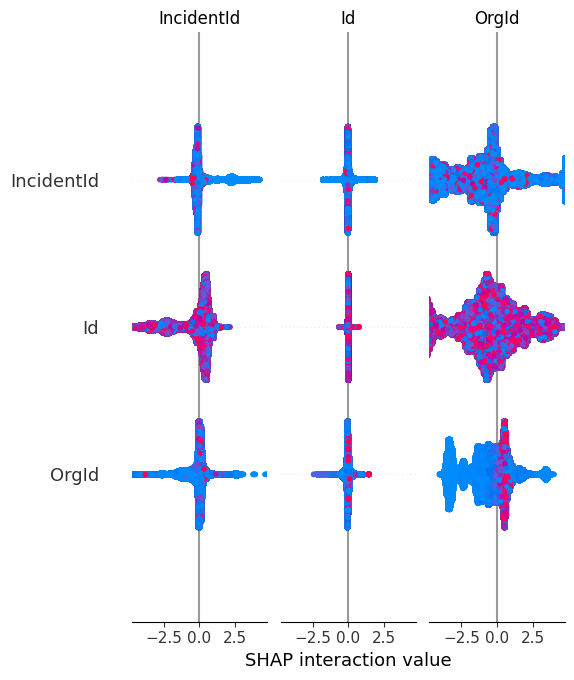

In [40]:
import matplotlib.pyplot as plt
# Summary plot for feature importance
shap.summary_plot(shap_values, X_val,plot_type = "bar")
plt.show()

In [28]:
# Defining top 11 features based on SHAP
top_11_features = ['OrgId', 'IncidentId', 'AlertTitle', 'DetectorId', 
                   'AlertId', 'Category', 'Hour', 'Time', 'Day', 'EntityType', 'City']

In [29]:

# Filter datasets for top 11 features
X_train_top11 = X_train_sample[top_11_features]
X_val_top11 = X_val[top_11_features]

In [30]:

# Verify shapes
print("Shape of training set with top features:", X_train_top11.shape)
print("Shape of validation set with top features:", X_val_top11.shape)

Shape of training set with top features: (713824, 11)
Shape of validation set with top features: (1784561, 11)


In [31]:
# Train the XGBoost model with top features
xgb_top11 = XGBClassifier(random_state=42,tree_method='hist',device='cuda')
xgb_top11.fit(X_train_top11, y_train_sample)

# Predict on the validation set
y_val_pred_top11 = xgb_top11.predict(X_val_top11)

# Evaluate performance

print("Validation Set Classification Report (Top 11 Features):")
print(classification_report(y_val, y_val_pred_top11, target_names=['Class 0', 'Class 1', 'Class 2']))

C:\Users\vinoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:41:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
C:\Users\vinoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:41:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Validation Set Classification Report (Top 11 Features):
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93    765560
     Class 1       0.93      0.87      0.90    390976
     Class 2       0.95      0.92      0.94    628025

    accuracy                           0.93   1784561
   macro avg       0.93      0.92      0.92   1784561
weighted avg       0.93      0.93      0.93   1784561



# Hyperparameter tuning

In [32]:
from sklearn.model_selection import RandomizedSearchCV
# Define hyperparameter grid
param_distributions = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2, 3]  # To address class imbalance further
}

# Randomized search with GPU support
random_search_top11 = RandomizedSearchCV(
    estimator=XGBClassifier(
        random_state=42,
        tree_method='hist',  # Enable GPU support
        device='cuda'  # Use GPU for predictions
    ),
    param_distributions=param_distributions,
    scoring='f1_macro',  # Scoring metric
    cv=3,
    n_iter=20,  # Number of random combinations
    verbose=1,
    n_jobs=-1  # Parallel processing
)

# Perform hyperparameter tuning
random_search_top11.fit(X_train_top11, y_train_sample)

# Get the best model
best_xgb_top11 = random_search_top11.best_estimator_
print("Best Parameters:", random_search_top11.best_params_)

# Evaluate on validation set
y_val_pred_best_top11 = best_xgb_top11.predict(X_val_top11)
print("Validation Set Classification Report (Tuned Top 11 Features):")
print(classification_report(y_val, y_val_pred_best_top11, target_names=['Class 0', 'Class 1', 'Class 2']))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\vinoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:46:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
C:\Users\vinoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:46:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
C:\Users\vinoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:46:54] 

Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Validation Set Classification Report (Tuned Top 11 Features):
              precision    recall  f1-score   support

     Class 0       0.94      0.97      0.95    765560
     Class 1       0.94      0.91      0.93    390976
     Class 2       0.96      0.95      0.95    628025

    accuracy                           0.95   1784561
   macro avg       0.95      0.94      0.94   1784561
weighted avg       0.95      0.95      0.95   1784561



In [33]:
import joblib

# Save the model
joblib.dump(best_xgb_top11, 'best_xgboost_Classification_model_SMOTE.pkl')
print("Model saved as best_xgboost_Classification_model_SMOTE.pkl")

Model saved as best_xgboost_Classification_model_SMOTE.pkl


In [35]:

# Selecting only top 11 features and setting features and target
X_test_top11 = testdf_processed[top_11_features] 
y_test = testdf_processed['IncidentGrade']

In [36]:
# Predicting on the test set using the best model
y_test_pred_top11 = best_xgb_top11.predict(X_test_top11)

# Evaluate performance on test data
print("Test Set Classification Report (Top 11 Features):")
print(classification_report(y_test, y_test_pred_top11, target_names=['Class 0', 'Class 1', 'Class 2']))

Test Set Classification Report (Top 11 Features):
              precision    recall  f1-score   support

     Class 0       0.91      0.93      0.92   1630942
     Class 1       0.90      0.86      0.88    868897
     Class 2       0.93      0.93      0.93   1422856

    accuracy                           0.91   3922695
   macro avg       0.91      0.91      0.91   3922695
weighted avg       0.91      0.91      0.91   3922695

